In [ ]:
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras import layers
from keras import models
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
conv_base.trainable = False
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))
model.summary()


model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])


train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1. / 255)

original_dataset_dir = 'C:/Users/Welcome/Dogs Emotion Recognition/Dogs_Emotion_Recognition_Dataset'
base_dir = 'C:/Users/Welcome/Dogs Emotion Recognition/Dogs_Emotion_Recognition_Dataset'
# os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    color_mode='rgb',
    batch_size=20,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    color_mode='rgb',
    batch_size=20,
    class_mode='categorical'
)

for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

history = model.fit(
    train_generator,
    
    epochs=30,
    validation_data=validation_generator
    
)
model.save('doggos_imagenet-slow-1.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 16,813,124
Trainable params: 2,098,436
Non-trainable params: 14,714,688
_________________________________________________________________


C:\Users\Welcome\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Found 1200 images belonging to 4 classes.
Found 400 images belonging to 4 classes.
data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20, 4)
Epoch 1/30
60/60 [==============================] - 436s 7s/step - loss: 1.4560 - acc: 0.3500 - val_loss: 1.8797 - val_acc: 0.1300
Epoch 2/30
60/60 [==============================] - 294s 5s/step - loss: 1.2188 - acc: 0.4583 - val_loss: 2.0443 - val_acc: 0.1150
Epoch 3/30
60/60 [==============================] - 286s 5s/step - loss: 1.1322 - acc: 0.5108 - val_loss: 2.2370 - val_acc: 0.1300
Epoch 4/30
60/60 [==============================] - 291s 5s/step - loss: 1.1054 - acc: 0.5317 - val_loss: 2.3608 - val_acc: 0.1125
Epoch 5/30
60/60 [==============================] - 277s 5s/step - loss: 1.0458 - acc: 0.5667 - val_loss: 2.5293 - val_acc: 0.1200
Epoch 6/30
60/60 [==============================] - 271s 5s/step - loss: 1.0176 - acc: 0.5800 - val_loss: 2.6860 - val_acc: 0.0950
Epoch 7/30
60/60 [==============================] - 262s 4s/step 

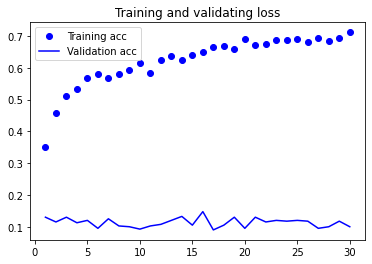

In [2]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validating loss')
plt.legend()

plt.show()